<div class="markdown-google-sans">

# Zárthelyi dolgozat
</div>

- Másold le a dokumentumot a megszokott módon és nevezd át, úgy, hogy az tartalmazza a nevedet és a Neptun-kódodat (Vezetknév_Keresztnév-NEPTUNKÓD)!
- Miután átnevezted, oszd meg a dokumentumot velünk szerkesztési joggal! (az email-címeinket a táblán találod)


- Kérünk benneteket, hogy ahol csak lehetséges, legjobb tudomásotok szerint kommentezzétek fel a kódot, illetve válaszoljatok szövegesen is.
- A hangsúly azon van, ahogyan előállítjátok a kért adatokat, nem azok pontosságán, így ha valahol hibás predikációt ad a modell nem gond, (de lehetőség szerint ismerjétek fel, és írjátok oda, hogy mi lenne az elvárt viselkedés szerintetek).
- <u>Ezen felül, ha előre láthatóan ki fogtok futni az időből, akkor lehetőség szerint írjátok le szövegesen, mit csináltatok volna a maradék feladatokkal!</u>


- A zárthelyi megírásához használhattok bármilyen segédanyagot, kivéve egymást. **Se online, se offline!**


**Sok Sikert Kívánunk!**

---

# 1. feladat

Az https://github.com/kiscsonti/student_data/raw/main/mushroom_dataset.zip fájl egy adatbázit tartalmaz gombákról. Töltsd le és írj egy egyszerű döntési szabályt (egy jellemzőből), ami jobban dönti el, hogy ehető-e a gomba (`class=e`) mint a leggyakoribb osztály baseline. Kiértékelési metrikaként a mérgező osztály (`class=p`) F1 Score-ját használd!

## A jellemzőkről leírás:

* class: edible=e, poisonous=p
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* gill-attachment: attached=a,descending=d,free=f,notched=n
* stalk-shape: enlarging=e,tapering=t
* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* veil-type: partial=p,universal=u
* veil-color: brown=n,orange=o,white=w,yellow=y
* ring-number: none=n,one=o,two=t

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/kiscsonti/student_data/main/mushroom.csv")
dataset
classlabel = dataset["class"]
features = dataset.iloc[:,1:]

In [3]:
from sklearn.dummy import DummyClassifier

In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
dummy_clf = DummyClassifier(strategy="most_frequent") # tanító adatbázis leggyakoribb osztálya lesz mindig a predikció
dummy_clf.fit(features, classlabel) # ugyanazon a tanító adatbázison "tanítjuk"
baseline_prediction = dummy_clf.predict(features) # predikció a kiértékelő adatbázison
f1_score(classlabel,baseline_prediction ,labels = ['e','p'],pos_label='e')
from sklearn.metrics import classification_report
print(classification_report(classlabel, baseline_prediction))
accuracy_score(baseline_prediction,classlabel)

              precision    recall  f1-score   support

           e       0.52      1.00      0.68      4208
           p       0.00      0.00      0.00      3916

    accuracy                           0.52      8124
   macro avg       0.26      0.50      0.34      8124
weighted avg       0.27      0.52      0.35      8124



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.517971442639094

In [ ]:
from pandas import DataFrame
pred_lab=[]
for i in features:
  if i[0] == "y":
    pred_lab.append("p")
  else:
    pred_lab.append("e")
baseline_prediction1 = DataFrame(data = pred_lab)
baseline_prediction1.shape

(7, 1)

In [ ]:
f1_score(classlabel,baseline_prediction1 ,labels = ['e','p'],pos_label='e')
from sklearn.metrics import classification_report
print(classification_report(classlabel, pred_lab))

ValueError: ignored

# 2. feladat

Hajts végre gépi tanulási kísérletet arra nézve, hogy egy gomba mérgező/ehető mennyire jól állapítható meg a jellemzők alapján! Használd az adat véletlenszerű 20%-át kiértékelő adatbázisnak.

In [6]:

from sklearn import preprocessing
# ha csak a diszkrét változókat one hot encodoljuk:
ohe = preprocessing.OneHotEncoder() #one hot encoding
ohe_features = ohe.fit_transform(features)


In [7]:
from sklearn.model_selection import train_test_split
features_train, features_test, classlabel_train, classlabel_test = train_test_split(ohe_features, classlabel, test_size=0.2, random_state=42)

In [8]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(features_train,classlabel_train)
results = dt.predict(features_test)
f1_score(classlabel_test,results ,pos_label='p')

0.974294670846395

In [9]:
from sklearn.metrics import classification_report
print(classification_report(classlabel_test, results))

              precision    recall  f1-score   support

           e       0.99      0.96      0.98       843
           p       0.96      0.99      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.98      0.97      1625
weighted avg       0.98      0.97      0.97      1625



In [10]:
!pip install eli5
import eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=817d98d55c0005fd8f7d16ee07c2778164cc47d3cf5ec9e8ba2193b37d50c8c2
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/metaestimators.py)

In [11]:
eli5.show_weights(dt, show=["decision_tree"], filled="True")

NameError: name 'eli5' is not defined

# 3. feladat
Próbálj ki egy másik gépi tanuló algoritmust is a 2. feladatra. Mindkettőnek hangold be a meta-paraméterit. (bónus feladat: a meta-paraméter értékekre a túltanási ábra kirajzolása)

A végén szövegként írd le, hogy a két algoritmus közül melyik a jobb!


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4) # n_neighbors a k érték (szomszédok száma)

In [ ]:
from sklearn.metrics import accuracy_score
model.fit(features_train,classlabel_train)
prediction = model.predict(features_test)
f1_score(classlabel_test,prediction ,pos_label='p')

0.9735182849936947

Paraméterek hangolása

DT-hangolás


In [ ]:
### különböző fa mélységi értékekkel tanítjuk a fát
dt_valid_f1=[]
dt_train_f1=[]
for d in range(1,40):
  dt = tree.DecisionTreeClassifier(max_depth=d) # döntési fa mélysége
  dt.fit(features_train,classlabel_train)  # tanítunk a tanító adatbázison
  valid_prediction = dt.predict(features_test)
  dt_valid_f1.append(f1_score(classlabel_test, valid_prediction, pos_label="p")) # kiértékelés a validációs halmazon
  train_prediction = dt.predict(features_train)
  dt_train_f1.append(f1_score(classlabel_train, train_prediction, pos_label="p")) # a tanító adatbázison is kiértékeljük a túltanulási vizsgálatokhoz

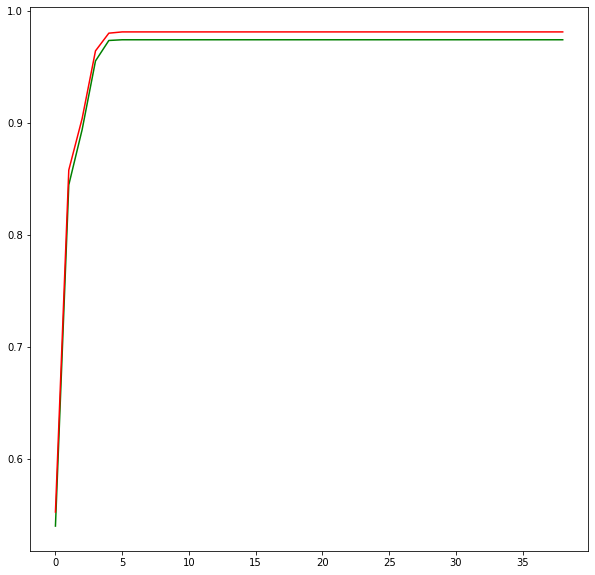

In [ ]:
### jelenítsük meg az eredményeket
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(dt_valid_f1, c="green")
plt.plot(dt_train_f1, c="red")

KNN-hangolás

In [ ]:
### különböző fa mélységi értékekkel tanítjuk a fát
knn_valid_f1=[]
knn_train_f1=[]
for k in range(1,16,2): # páratlan k értékek
  knn = KNeighborsClassifier(n_neighbors=k) # kNN különböző k értékekkel
  knn.fit(features_train, classlabel_train)
  valid_prediction = knn.predict(features_test)
  knn_valid_f1.append(f1_score(classlabel_test, valid_prediction, pos_label="p"))
  train_prediction = knn.predict(features_train)
  knn_train_f1.append(f1_score(classlabel_train, train_prediction, pos_label="p"))

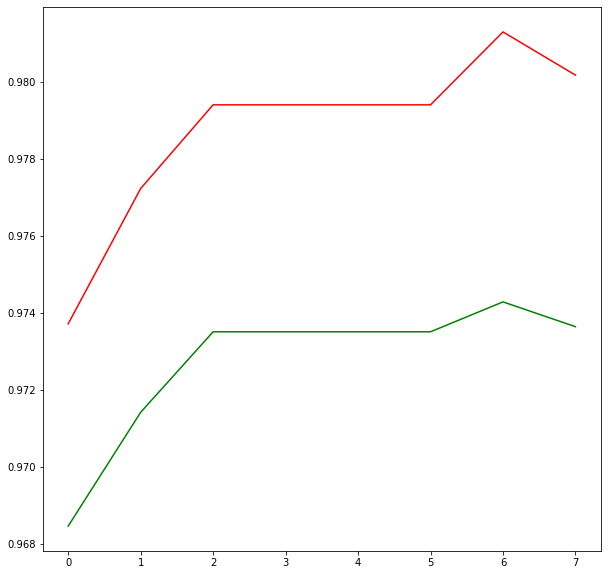

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(knn_valid_f1, c="green")
plt.plot(knn_train_f1, c="red")

In [ ]:
# KNN legjobb predikció
model = KNeighborsClassifier(n_neighbors=4) # n_neighbors a k érték (szomszédok száma)
model.fit(features_train,classlabel_train)
prediction = model.predict(features_test)
print(f1_score(classlabel_test,prediction ,pos_label='p'))

# DT legjobb predikció
dt = tree.DecisionTreeClassifier(max_depth=4) # döntési fa mélysége
dt.fit(features_train,classlabel_train)  # tanítunk a tanító adatbázison
valid_prediction = dt.predict(features_test)
f1_score(classlabel_test,valid_prediction,pos_label='p')

0.9735182849936947


0.9553903345724908

4 mélység/szomszédnál (és egyébként mindenhol máshol is) a KNN nyer